In [152]:
# import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import datetime

In [153]:
# reading the customers data  
df_c = pd.read_csv('customers.csv')
df_c.head()

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [154]:
# dropping ther first column
df_c.drop('Unnamed: 0', axis = 1 ,inplace = True)

In [155]:
# checking the real names of the column 
df_c.columns.tolist()

['\ufeffcustomerid',
 'entity',
 'name',
 'surname',
 'birth_date',
 'sex',
 'country',
 'state',
 'purpose',
 'deal_satisfaction',
 'mortgage',
 'source']

In [156]:
# modifying customerid with its correct name 
df_c.rename(columns = {'\ufeffcustomerid':'customerid'}, inplace = True )

In [157]:
df_c.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [158]:
# checking for missing values 
df_c.isnull().sum()

customerid           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [159]:
# checking for duplicates 
df_c.duplicated().sum()

0

In [160]:
# checking the data types
df_c.dtypes

customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [161]:
# creating a new column with the full name of the customer 
df_c['full_name']= df_c['name'] + ' ' +df_c['surname']

In [162]:
# dropping the name and the surname because we created a full name instead 
df_c.drop(['name','surname'], axis = 1 , inplace = True)

In [163]:
# turing the birth_date column into date 
df_c['birth_date']= pd.to_datetime(df_c['birth_date'])

In [164]:
df_c['source'].unique()

array(['Website', 'Agency', 'Client'], dtype=object)

In [165]:
# converting all of the source table entries to lowercase
df_c['source'] = df_c['source'].str.lower()

In [166]:
df_c['purpose'].unique()

array(['Home', 'Investment'], dtype=object)

In [167]:
# converting all of the purpose table entries to lowercase
df_c['purpose'] = df_c['purpose'].str.lower()

In [168]:
# if the mortgage = yes we assign to it the value of 1 else 0 
# that way it will be easier for analysis
df_c['mortgage'] = df_c['mortgage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [169]:
df_c['mortgage'].unique()

array([1, 0], dtype=int64)

In [170]:
df_c.head()

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,Individual,1968-05-11,F,USA,California,home,4,1,website,Kareem Liu
1,C0010,Individual,1962-11-26,M,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,Individual,1959-04-07,M,USA,California,home,4,1,agency,Kale Gay
3,C0137,Individual,1959-11-25,M,USA,California,home,5,0,website,Russell Gross
4,C0174,Company,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [171]:
# to examine statistical summaries of the data.
df_c.describe(include = 'all')

,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,162,162,155,155,162,154,162,162.000000,162.000000,162,162
unique,162,2,NaN,2,9,9,2,NaN,NaN,3,162
top,C0110,Individual,NaN,M,USA,California,home,NaN,NaN,website,Kareem Liu
freq,1,155,NaN,87,146,100,112,NaN,NaN,93,1
mean,NaN,NaN,1961-08-27 14:42:34.838709664,NaN,NaN,NaN,NaN,3.456790,0.370370,NaN,NaN
min,NaN,NaN,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,1952-10-11 12:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,1963-07-15 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,1970-12-29 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


In [172]:
# reading the properties data  
df_p = pd.read_csv('properties.csv')
df_p.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [173]:
# removing the unnecessary column
df_p.drop('Unnamed: 0', axis = 1 , inplace = True )

In [174]:
# checking for the real names of the columns
df_p.columns.tolist()

['\ufeffid',
 'building',
 'date_sale',
 'type',
 'property#',
 'area',
 'price',
 'status',
 'customerid']

In [175]:
# modifying the id column to its real name
df_p.rename(columns = {'\ufeffid':'id'}, inplace = True)

In [176]:
# checking for missing values 
df_p.isnull().sum()

id             0
building       0
date_sale      0
type           0
property#      0
area           0
price          0
status         0
customerid    72
dtype: int64

In [177]:
# checking for duplicates
df_p.duplicated().sum()

0

In [178]:
# checking for data types
df_p.dtypes

id              int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [179]:
# it seems that the data that doesnt have a customerid its building is not sold 
# so in our case we will nor drop the missing values, instead use them to know what we sold and 
# what we didn't
df_p['status'].value_counts()

status
 Sold     195
-          72
Name: count, dtype: int64

In [180]:
# removing the unnecessary spaces of the status table
df_p['status']= df_p['status'].str.strip() 

In [181]:
# assigning the value of 1 if its sold and 0 if not  
df_p['status']= df_p['status'].apply(lambda x: 1 if x == 'Sold' else 0)

In [182]:
# renaming the status column to sold to be more accurate 
df_p.rename(columns = {'status':'sold'}, inplace = True)

In [183]:
df_p[df_p['sold'] == 0]

,id,building,date_sale,type,property#,area,price,sold,customerid
178,5052,5,#NUM!,Apartment,52,1769.48,"$532,877.38",0,NaN
196,1002,1,#NUM!,Apartment,2,1238.58,"$400,865.92",0,NaN
197,1003,1,#NUM!,Office,3,713.71,"$217,787.71",0,NaN
198,1008,1,#NUM!,Apartment,8,763.21,"$219,630.90",0,NaN
199,1019,1,#NUM!,Apartment,19,798.50,"$244,624.87",0,NaN
...,...,...,...,...,...,...,...,...,...
262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",0,NaN
263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",0,NaN
264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",0,NaN
265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",0,NaN


In [184]:
# since the id is integer we will assign it to string not to be included with our integer calculations
df_p['id'] = df_p['id'].astype(str)

In [185]:
# same for the building names
df_p['building'] = df_p['building'].astype(str)

In [186]:
# assigning the property table with its correct name 
df_p.rename(columns= {'property#':'property'}, inplace = True)

In [187]:
df_p['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [188]:
# assigning missing values if the we encounterd the value of NUM! 
# because its a lead that our properties are not yet sold 
df_p['date_sale'] = np.where(df_p['date_sale']=='#NUM!', pd.NA, df_p['date_sale'])

In [189]:
df_p['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [190]:
df_p['date_sale'].isnull().sum()

72

In [191]:
# turning the date_sale table type to date 
df_p['date_sale'] = pd.to_datetime(df_p['date_sale'])

In [192]:
# checing the overall statistical summary
df_p.describe(include = 'all')

,id,building,date_sale,type,property,area,price,sold,customerid
count,267,267,195,267,267.000000,267.000000,267,267.000000,195
unique,240,5,NaN,2,NaN,NaN,266,NaN,162
top,5041,3,NaN,Apartment,NaN,NaN,"$460,001.26",NaN,C0174
freq,2,63,NaN,259,NaN,NaN,2,NaN,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,27.580524,936.221311,NaN,0.730337,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,1.000000,410.710000,NaN,0.000000,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,14.500000,756.210000,NaN,0.000000,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,28.000000,798.280000,NaN,1.000000,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,40.000000,1121.950000,NaN,1.000000,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,59.000000,1942.500000,NaN,1.000000,NaN


In [193]:
df_p.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property               int64
area                 float64
price                 object
sold                   int64
customerid            object
dtype: object

In [194]:
df_p['customerid'].unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [195]:
# removing the unnecessary white spaces from its values
df_p['customerid'] = df_p['customerid'].str.replace(' ','')

In [196]:
# removing the $ and the , signs from the price column to turn it into float successfully
df_p['price']= df_p['price'].str.replace('$','').str.replace(',','', regex=True)

In [197]:
df_p['price'] = df_p['price'].astype(float)

In [198]:
df_p['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [199]:
# converting its values to lowercase
df_p['type'] = df_p['type'].str.lower()

In [200]:
df_p.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property               int64
area                 float64
price                float64
sold                   int64
customerid            object
dtype: object

In [201]:
df_p.isnull().sum()

id             0
building       0
date_sale     72
type           0
property       0
area           0
price          0
sold           0
customerid    72
dtype: int64

In [202]:
# now we merge our 2 dataframes into 1 on corresponding customerid column
# but since we are interested in the missing values that leads to unsold properties 
# we will use a left join instead 
df = df_p.merge(df_c, on = 'customerid', how = 'left' )

In [203]:
df

,id,building,date_sale,type,property,area,price,sold,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,Individual,1986-06-21,F,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,Individual,1983-02-24,F,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,Individual,1985-12-27,M,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,Individual,1985-12-27,M,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,Individual,1979-05-15,F,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,322610.74,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,279191.26,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,287996.53,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,365868.78,0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
# checking for the missing values 
df.isnull().sum()

id                    0
building              0
date_sale            72
type                  0
property              0
area                  0
price                 0
sold                  0
customerid           72
entity               72
birth_date           89
sex                  89
country              72
state                86
purpose              72
deal_satisfaction    72
mortgage             72
source               72
full_name            72
dtype: int64

In [205]:
# checing the statistical summary for my numeric data 
df.describe()

,date_sale,property,area,price,sold,birth_date,deal_satisfaction,mortgage
count,195,267.000000,267.000000,267.000000,267.000000,178,195.000000,195.000000
mean,2006-11-08 14:38:46.153846272,27.580524,936.221311,281171.901386,0.730337,1961-01-08 11:35:43.820224704,3.600000,0.317949
min,2004-03-01 00:00:00,1.000000,410.710000,117564.070000,0.000000,1931-02-13 00:00:00,1.000000,0.000000
25%,2006-04-16 00:00:00,14.500000,756.210000,217553.055000,0.000000,1951-05-04 06:00:00,3.000000,0.000000
50%,2007-03-01 00:00:00,28.000000,798.280000,249075.660000,1.000000,1962-09-23 00:00:00,4.000000,0.000000
75%,2007-09-01 00:00:00,40.000000,1121.950000,326964.855000,1.000000,1970-07-09 06:00:00,5.000000,1.000000
max,2010-05-01 00:00:00,59.000000,1942.500000,538271.740000,1.000000,1986-06-21 00:00:00,5.000000,1.000000
std,NaN,15.361437,284.894858,89119.121005,0.444618,NaN,1.340872,0.466878


### Breakdown of totals by building

In [206]:
df.groupby('building')[['sold','mortgage']].sum()

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


### Breakdown of averages by building

In [207]:
# m4 zy al tanya 
df.groupby('building')[['area', 'price', 'deal_satisfaction']].mean()

,area,price,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


In [208]:
df['deal_satisfaction'].dtype

dtype('float64')

In [209]:
df['country'].unique()

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [210]:
# cleanign the country table from its unnecessary white spaces
df['country'] = df['country'].str.replace(' ','')

### Breakdown of totals by country

In [211]:
df.groupby('country')[['sold','mortgage']].sum()

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


### Breakdown of averages by country

In [212]:
df.groupby('country')[['area', 'deal_satisfaction','price']].mean()

,area,deal_satisfaction,price
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


### Frequency distribution by state

In [213]:
df['state'] = np.where(df['state']=='', pd.NA, df['state'])     
df['state'] = np.where(df['country']!='USA', pd.NA, df['state'])  

In [214]:
sold_by_state = df.groupby('state')[['sold']].sum().sort_values(by = 'sold',ascending = False)
sold_by_state

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [215]:
# renaming the sold column to frequency 
sold_by_state.rename(columns ={'sold':'frequency'}, inplace = True)

In [216]:
# creating a relative frequency table
sold_by_state['relative_frequency'] = sold_by_state['frequency'] / sold_by_state['frequency'].sum()

In [217]:
# creating a cummulative frequency table
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()

In [218]:
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [219]:
df.head()

,id,building,date_sale,type,property,area,price,sold,customerid,entity,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,Individual,1986-06-21,F,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,Individual,1983-02-24,F,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,Individual,1985-12-27,M,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,Individual,1985-12-27,M,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,Individual,1979-05-15,F,USA,California,home,4.0,0.0,agency,Alessandra Perry


## Customers Age

In [220]:
# creating an age_of_purchase column but substracting the date of sale and the birh date of the customer
df['age_of_purchase'] = df['date_sale'] - df['birth_date']

In [221]:
df['age_of_purchase'].unique()

<TimedeltaArray>
[ '7073 days',  '8255 days',  '7856 days',  '8009 days',  '9302 days',
  '9380 days',  '9350 days',  '9836 days',  '9585 days', '10272 days',
 ...
 '24351 days', '24925 days', '25113 days', '25316 days', '25859 days',
 '26590 days', '26659 days', '26564 days', '27867 days',          NaT]
Length: 160, dtype: timedelta64[ns]

In [222]:
df['age_of_purchase'].dtype

dtype('<m8[ns]')

In [223]:
# getting the number of days 
df['age_of_purchase'] = df['age_of_purchase'].apply(lambda x: x.days)

In [224]:
df['age_of_purchase'].dtype

dtype('float64')

In [225]:
# dividing the days by 365 to get the years 
df['age_of_purchase'] = df['age_of_purchase'].apply(lambda x: x / 365)

In [226]:
df['age_of_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_of_purchase, Length: 267, dtype: float64

In [227]:
# we used the floor method to floor the year since we are interested into the integer year 
df['age_of_purchase'] = np.floor(df['age_of_purchase'])

In [228]:
df['age_of_purchase']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_of_purchase, Length: 267, dtype: float64

In [229]:
# creating an age interval
df['age_interval'] = pd.cut(df['age_of_purchase'], bins = 10, precision = 0)

In [230]:
df['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 30.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 30.0] < (30.0, 36.0] < (36.0, 42.0] ... (53.0, 59.0] < (59.0, 65.0] < (65.0, 70.0] < (70.0, 76.0]]

### Breakdown by age interval

In [231]:
df[['age_interval', 'sold']].groupby("age_interval").sum()

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 30.0]",16
"(30.0, 36.0]",29
"(36.0, 42.0]",30
"(42.0, 48.0]",24
"(48.0, 53.0]",22
"(53.0, 59.0]",19
"(59.0, 65.0]",12
"(65.0, 70.0]",18


In [232]:
# creating a price interval
df['price_intervals'] = pd.cut(df['price'], bins = 10 )

In [233]:
df['price_intervals']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_intervals, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

### Total number of properties

In [234]:
# total number of properties (sold and not sold)
total_properties_by_price= df[['price_intervals','sold']].groupby('price_intervals').count()

In [235]:
total_properties_by_price.rename(columns = {'sold': 'count'}, inplace = True )

In [236]:
total_properties_by_price

,count
price_intervals,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


###  Number of sold properties 

In [237]:
sold_properties_by_price = df[['price_intervals','sold']].groupby('price_intervals').sum()

In [238]:
sold_properties_by_price

,sold
price_intervals,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


###  Number of not sold properties 

In [239]:
# total number of properties (sold and not sold)
not_sold_properties_by_price = df[['price_intervals'
                                   ,'sold']][df['sold'] == 0].groupby('price_intervals').count()

In [240]:
not_sold_properties_by_price.rename(columns = {'sold': 'not_sold'}, inplace = True )

In [241]:
not_sold_properties_by_price

,not_sold
price_intervals,
"(117143.362, 159634.837]",1
"(159634.837, 201705.604]",4
"(201705.604, 243776.371]",20
"(243776.371, 285847.138]",13
"(285847.138, 327917.905]",7
"(327917.905, 369988.672]",6
"(369988.672, 412059.439]",8
"(412059.439, 454130.206]",3
"(454130.206, 496200.973]",4


###  All properties by price

In [242]:
        all_properties_by_price= pd.concat([total_properties_by_price ,
                                    not_sold_properties_by_price, sold_properties_by_price], axis =1 )

In [243]:
all_properties_by_price

,count,not_sold,sold
price_intervals,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


### Relationship between age and price

In [244]:
Correlation = df[['age_of_purchase','price']].corr()
Correlation

,age_of_purchase,price
age_of_purchase,1.00000,-0.17625
price,-0.17625,1.00000


<Axes: >

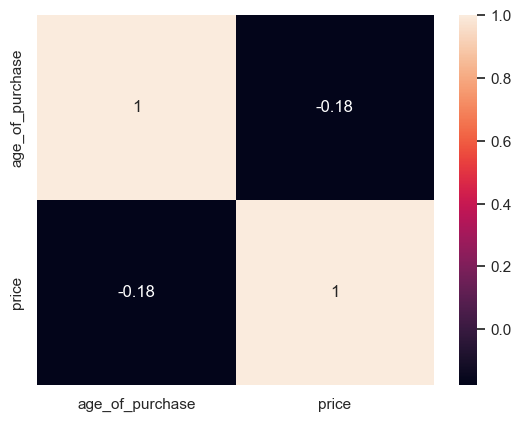

In [245]:
sns.heatmap(df[['age_of_purchase','price']].corr(), annot = True)

In [246]:
# For comprehensive results, we drop missing values 
data_no_na = df.dropna()

In [247]:
data_no_na[['age_of_purchase','price']].corr()

,age_of_purchase,price
age_of_purchase,1.000000,-0.197131
price,-0.197131,1.000000


### Data visualisations

## Deal Satisfaction Across Countries (Bar chart)

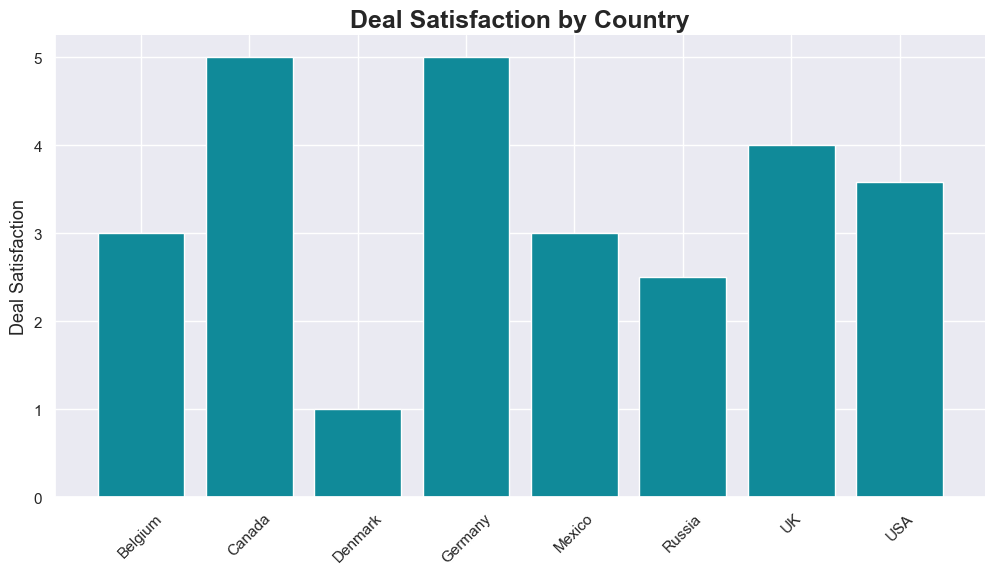

In [248]:
plt.figure(figsize = (12,6))
plt.bar(x = df.groupby('country')['deal_satisfaction'].mean().index,
       height = df.groupby('country')['deal_satisfaction'].mean(), color = "#108A99")
plt.xticks(rotation = 45)
sns.set_style('whitegrid')
sns.despine()
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold")
plt.ylabel("Deal Satisfaction", fontsize = 13 )
plt.savefig("deal_satisfaction_by_country_bar_chart.png")
plt.show()

## Customer Age Distribution (Histogram)

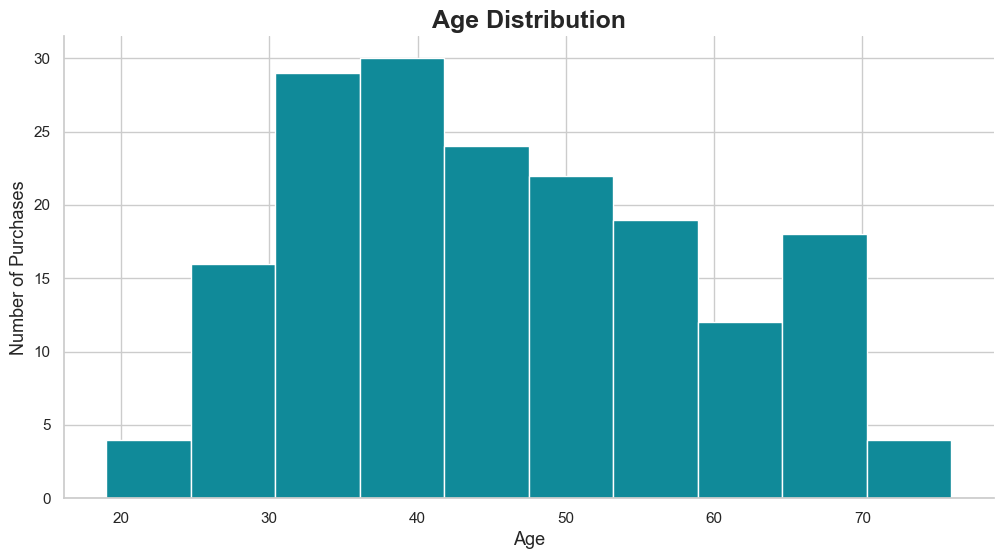

In [249]:
sns.set_style("whitegrid")        # override the default matplotlib style
plt.figure(figsize = (12, 6))  # determine the size of the figure

plt.hist(df['age_of_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#108A99")
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine() # removes the top and right border of our graph
plt.savefig("age_distribution_histogram.png")  # saving the chart as a picture
plt.show() 

## Segmentation by State (Pareto diagram)

In [250]:
# we need to import the relevant library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

In [251]:
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


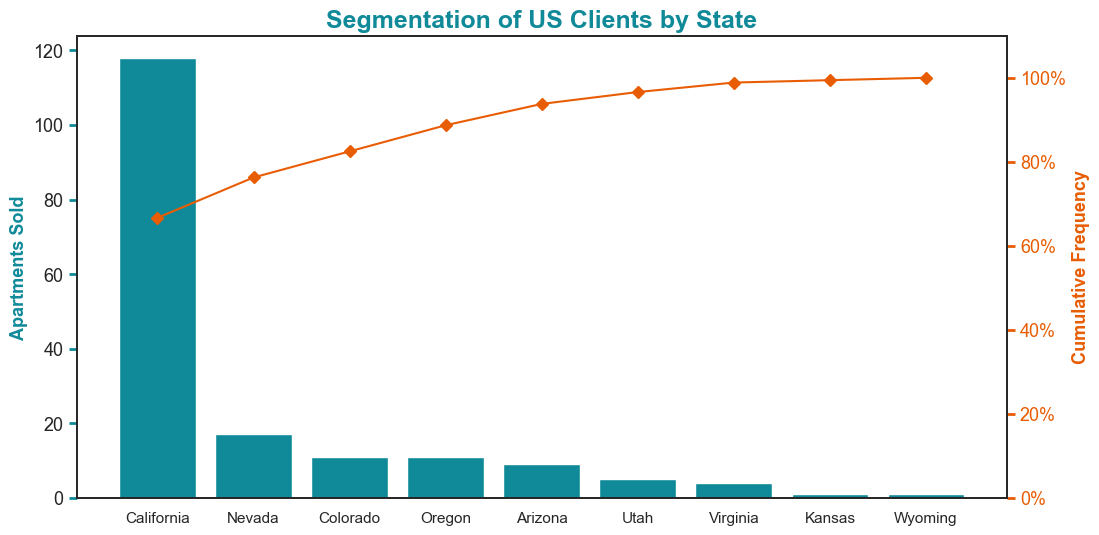

In [252]:
sns.set_style("white") 

fig, ax = plt.subplots(figsize = (12, 6))

ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")
# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold", 
              weight='bold',
              fontsize = 13,
              color = "#108A99")
# Formatting the y-axis ticks.
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of our visualization is a line chart sharing the x-axis with the bar chart, and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"], 
         color = "#E85D04", 
         marker = "D")
# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency", 
               color = "#E85D04", 
               weight = "bold",
               fontsize=13)
# Formatting the y-axis ticks.
ax2.tick_params(axis = "y", 
                colors = "#E85D04", 
                width = 2, 
                labelsize = 13)

# Adding a descriptive and engaging title to our visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 

# Displaying the final visualization.
plt.show()

## Total Sales per Year (Line chart)

In [253]:
df['year_of_sale']= df['date_sale'].dt.year

In [254]:
df['year_of_sale'] = df['year_of_sale'].fillna(0).astype(int)
df['year_of_sale'] = df['year_of_sale'].replace({0:pd.NA})

In [255]:
revenue_per_year = df[['year_of_sale','price']].groupby('year_of_sale').sum()
revenue_per_year.rename(columns = {'price':'revenue'}, inplace = True)

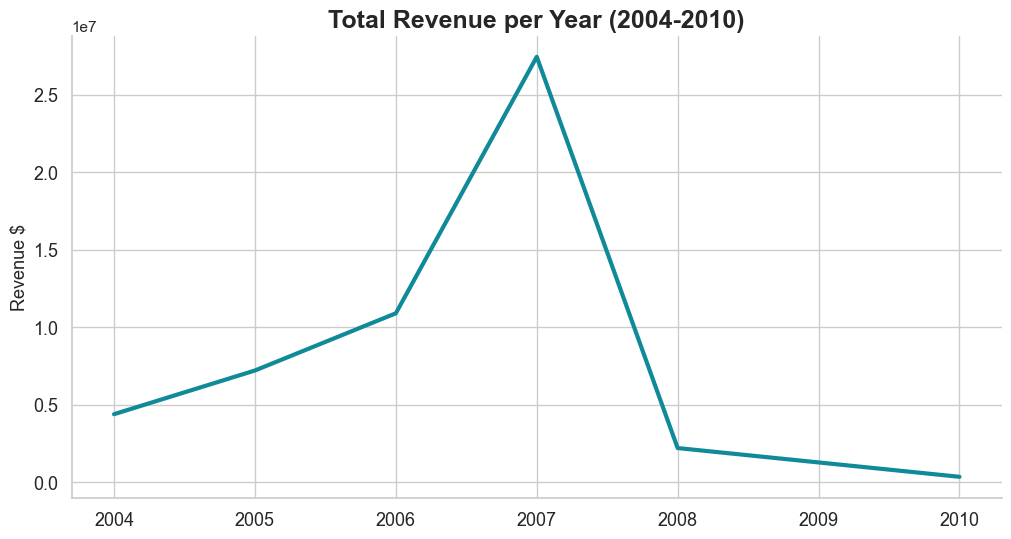

In [256]:
plt.figure(figsize = (12, 6))
sns.set_style("whitegrid")
df.groupby(df['year_of_sale'])['price'].sum().plot(kind = 'line', color='#108A99', 
         linewidth=3)
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $", fontsize = 13)
plt.xticks(fontsize = 13) # We'll format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # y-axis label formatting
plt.xlabel('')
sns.despine() # We'll remove the top and right borders of the chart for a cleaner look.

# saving the chart as a picture.
plt.savefig("total_revenue_per_year_in_M_line_chart.png")

plt.show() 

In [257]:
# creating revenues in millions
revenue_per_year['revenue$inM'] = revenue_per_year['revenue'] / 1000000

In [258]:
revenue_per_year

,revenue,revenue$inM
year_of_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [259]:
# making a copy of our revenue_per_year
revenue_per_year_adj = revenue_per_year.copy() 

In [260]:
revenue_per_year_adj

,revenue,revenue$inM
year_of_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [261]:
# adding a new row representing 2009 with zeros for values for the chart to be more accurate

In [262]:
revenue_per_year_adj

,revenue,revenue$inM
year_of_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [264]:
revenue_per_year_adj.loc[2009] = [0,0]

In [265]:
revenue_per_year_adj

,revenue,revenue$inM
year_of_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538
2009,0.00,0.000000


In [266]:
revenue_per_year_adj.index = ['2004','2005','2006','2007','2008','2010','2009']

In [267]:
revenue_per_year_adj = revenue_per_year_adj.loc[['2004','2005','2006','2007','2008','2009','2010']]
revenue_per_year_adj

,revenue,revenue$inM
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,0.00,0.000000
2010,357538.20,0.357538


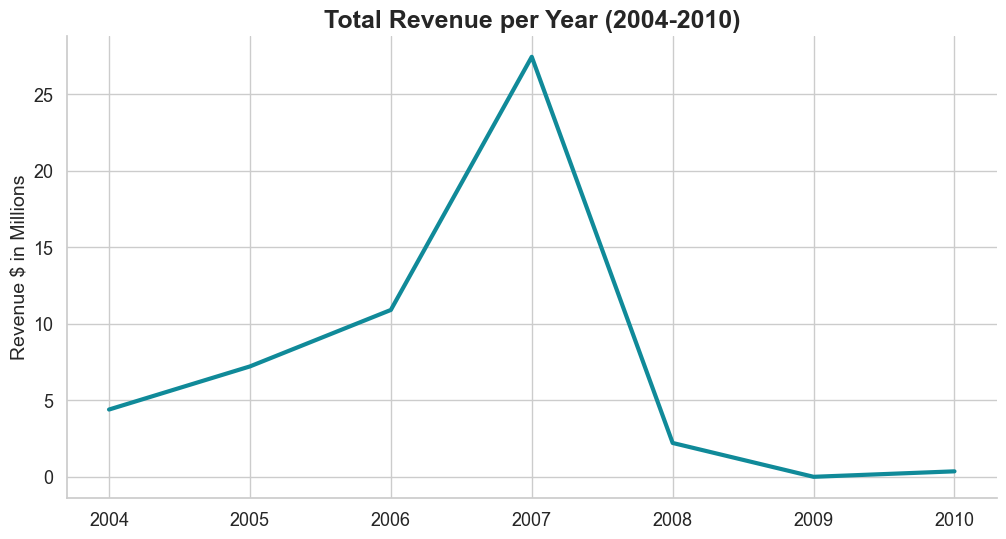

In [268]:
# Let's now plot with the adjusted data.

sns.set_style("whitegrid") # Apply a whitegrid style to override the default matplotlib style, keeping the grid for clarity.

plt.figure(figsize = (12, 6)) # Initiate a figure of appropriate size to match our other figures.

# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj['revenue$inM'], 
         color='#108A99', 
         linewidth=3)

# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) # Format the labels for the x-axis.
plt.yticks(fontsize = 13) # Format the y-axis labels.

sns.despine() # Remove the top and right border of the chart for a cleaner look.
plt.savefig("total_revenue_per_year_in_M_line_chart.png") # Export the chart as an image file.

plt.show() 

## Yearly Sales Distribution Across Buildings (Stacked Area Chart)

In [276]:
# creating a copy of our dataframe
df_for_stacked_area = df.copy()

In [277]:
# creating dummies
building_dummies = pd.get_dummies(df_for_stacked_area['building'])
building_dummies.head()

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [279]:
# stacking the columns to our dataframe
df_for_stacked_area = pd.concat([df_for_stacked_area,building_dummies ], axis = 1)

In [280]:
# renaming the columns of the buildings
df_for_stacked_area.rename(columns = {'1':'building1',
                                                    '2':'building2',
                                                    '3':'building3',
                                                    '4':'building4',
                                                    '5':'building5'}, inplace = True)

In [281]:
df_for_stacked_area.head()

,id,building,date_sale,type,property,area,price,sold,customerid,entity,...,full_name,age_of_purchase,age_interval,price_intervals,year_of_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,Individual,...,Madalyn Mercer,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,Individual,...,Lara Carrillo,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,Individual,...,Donavan Flowers,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,Individual,...,Darien Dorsey,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,Individual,...,Alessandra Perry,25.0,"(25.0, 30.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [282]:
# filtering for only sold properties
df_for_stacked_area = df_for_stacked_area[df_for_stacked_area['sold'] == 1]

In [283]:
stacked_area = df_for_stacked_area[['year_of_sale','building1','building2','building3',
                     'building4','building5']].groupby('year_of_sale').sum()

In [284]:
stacked_area

,building1,building2,building3,building4,building5
year_of_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


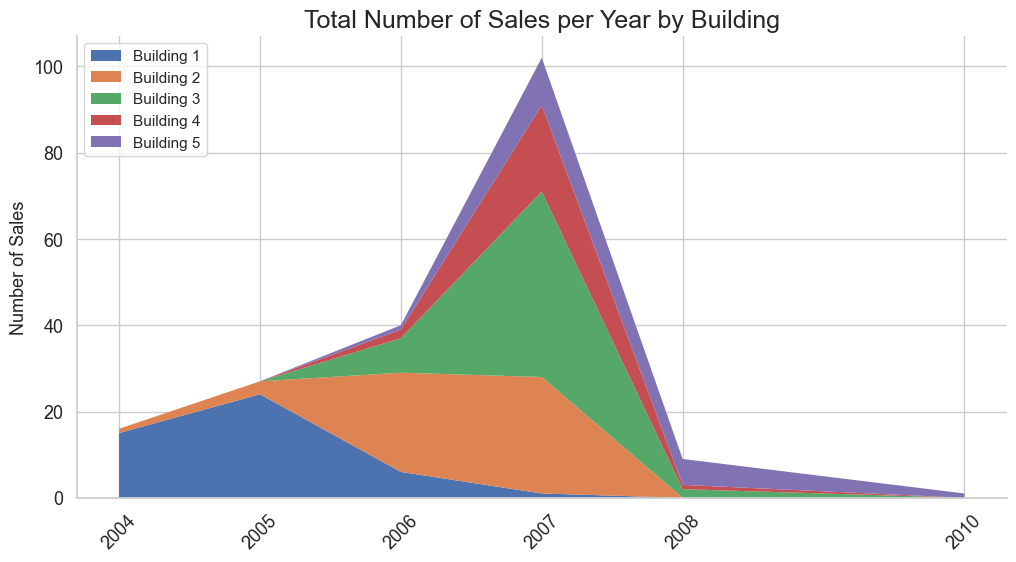

In [285]:
# let's choose different colors for each of the buldings
# We'll assign unique colors for each of the buildings to differentiate them on the plot.


# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show()

In [ ]:
# if we want to show 2009 to have a better insights

In [296]:
stacked_area_adj = stacked_area.copy() 

In [297]:
stacked_area_adj

,building1,building2,building3,building4,building5
year_of_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


In [298]:
stacked_area_adj.loc[2009]= 0,0,0,0,0

In [303]:
stacked_area_adj.index = ['2004','2005','2006','2007','2008','2010','2009']

In [304]:
stacked_area_adj

,building1,building2,building3,building4,building5
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1
2009,0,0,0,0,0


In [305]:
stacked_area_adj = stacked_area_adj.loc[['2004','2005','2006','2007','2008','2009','2010']]
stacked_area_adj

,building1,building2,building3,building4,building5
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2009,0,0,0,0,0
2010,0,0,0,0,1


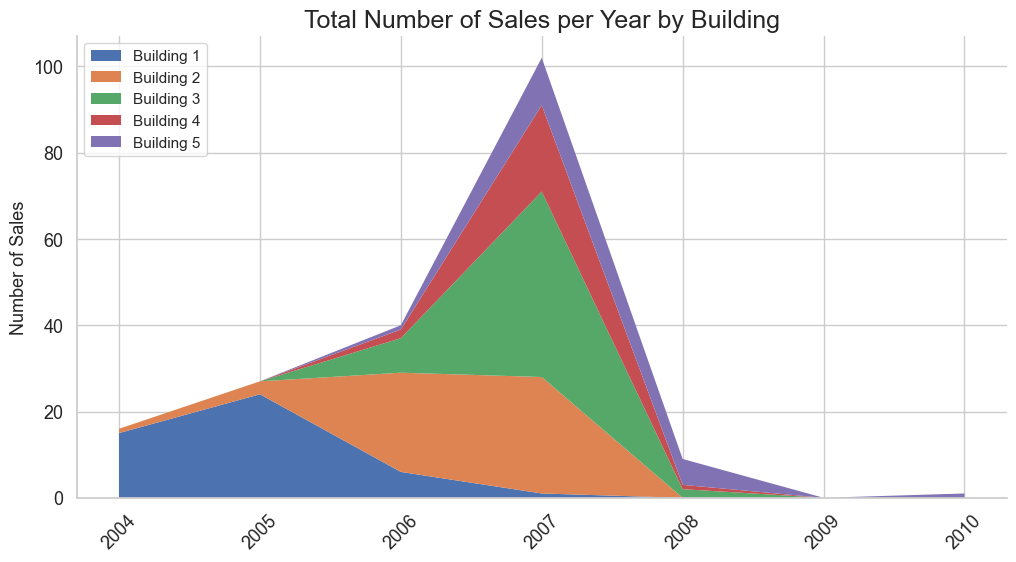

In [307]:
# let's choose different colors for each of the buldings
# We'll assign unique colors for each of the buildings to differentiate them on the plot.


# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area_adj.index, # The x-axis is simply the index (the year).
              stacked_area_adj['building1'],
              stacked_area_adj['building2'],
              stacked_area_adj['building3'],
              stacked_area_adj['building4'],
              stacked_area_adj['building5'],
              
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area_adj.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show()